# Case study on Supervised learning



Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
iris=pd.read_excel('iris.xls')
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
## Data Analysis
iris.shape

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [8]:
# Missing values
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Null values are present in the columns SL , SW , PL

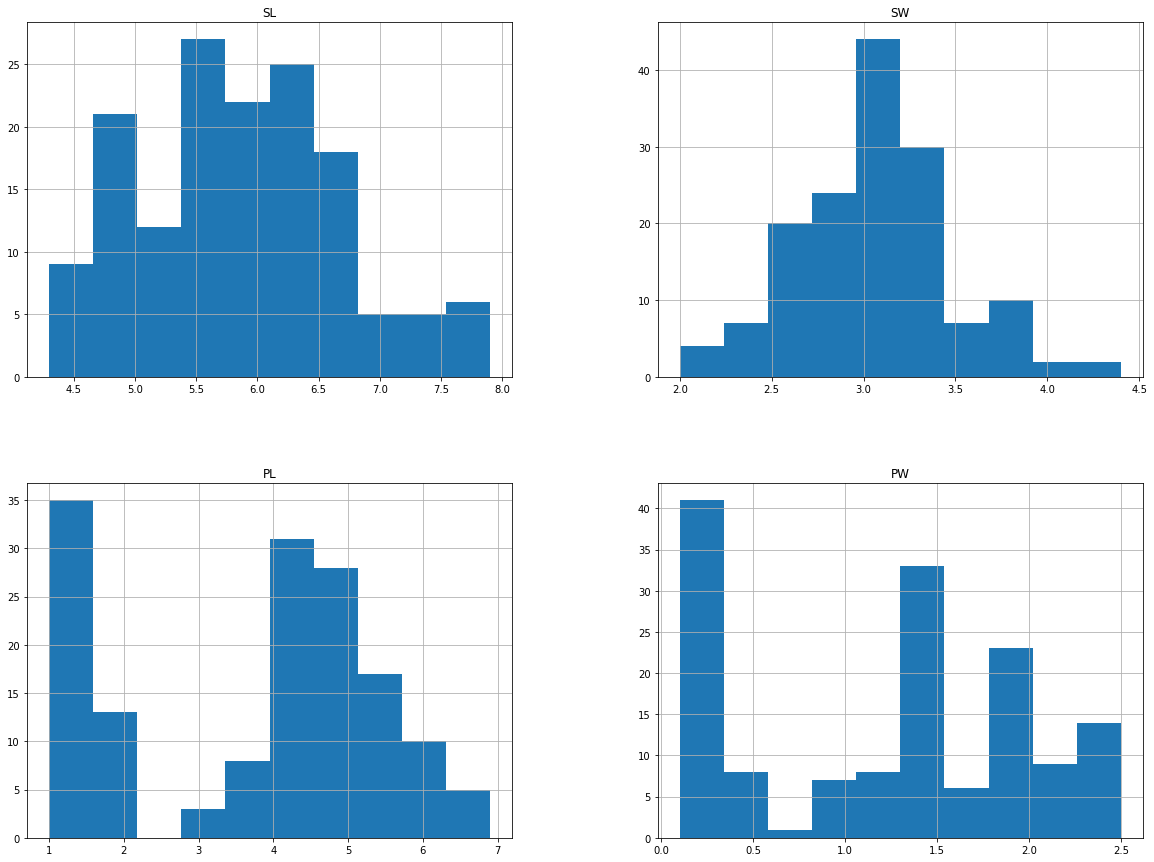

In [14]:
freqgraph=iris.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Pre-Processing

In [15]:
# Filling the missing values with mean
iris['SL']=iris['SL'].fillna(iris['SL'].median())
iris['SW']=iris['SW'].fillna(iris['SW'].median())
iris['PL']=iris['PL'].fillna(iris['PL'].median())

In [16]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now all the missing values are replaced by the median of the respective columns

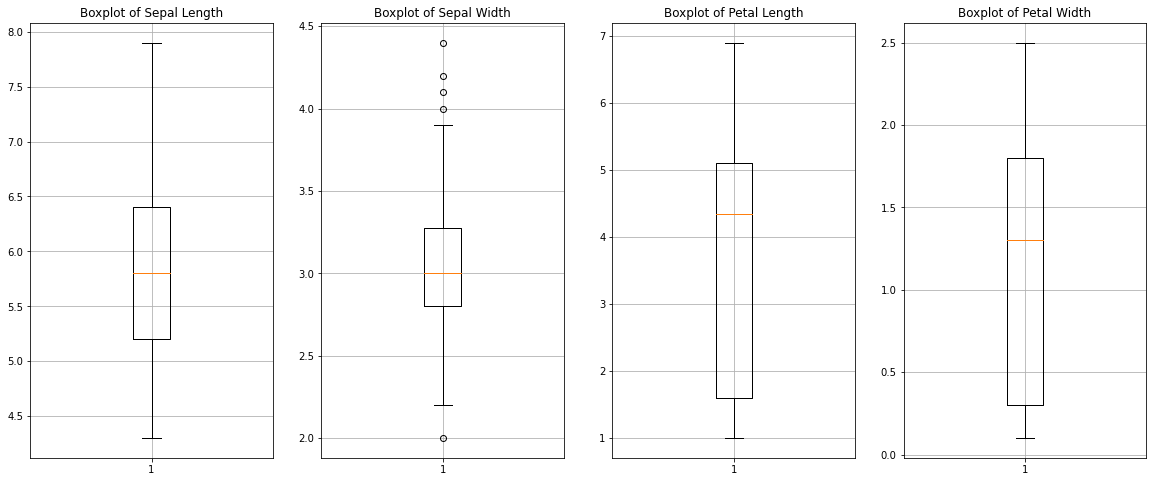

In [12]:
# Checking for the outliers by ploting the boxplots
plt.figure(figsize=(20,8))
plt.subplot(1,4,1)
plt.boxplot(iris['SL'])
plt.title('Boxplot of Sepal Length')
plt.grid()
plt.subplot(1,4,2)
plt.boxplot(iris['SW'])
plt.title('Boxplot of Sepal Width')
plt.grid()
plt.subplot(1,4,3)
plt.boxplot(iris['PL'])
plt.title('Boxplot of Petal Length')
plt.grid()
plt.subplot(1,4,4)
plt.boxplot(iris['PW'])
plt.title('Boxplot of Petal Width')
plt.grid()

In [17]:
# Checking columns
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Here SL,SW,PL,PW are feature variables and 'Classification' is the target variable

In [18]:
iris['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

The target variable 'Classification' is a categorical feature which needs to be converted into numerical feature by encoding

In [19]:
# Label encoding 'Classification'
from sklearn.preprocessing import LabelEncoder
labelenc=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    iris[a[i]]=labelenc.fit_transform(iris[a[i]])

In [20]:
iris['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [21]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [22]:
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=iris.drop(['Classification'],axis=1)
y=pd.DataFrame(iris['Classification'])

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [24]:
x_train.shape

(105, 4)

In [25]:
y_train.shape

(105, 1)

In [26]:
x_test.shape

(45, 4)

In [27]:
y_test.shape

(45, 1)

# Building the models

In [28]:
# Model 1 : Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [30]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score,precision_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))


Confusion matrix : 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 0.978
Accuracy : 0.978
Recall : 0.978
Precision : 0.978


In [32]:
# Model 2 : KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Text(0, 0.5, 'Accuracy')

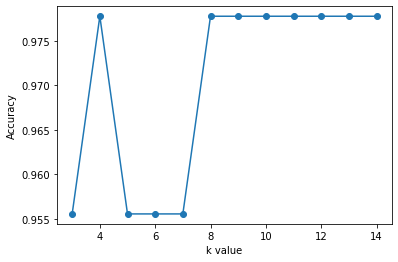

In [33]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

Highest accuracy 0.978 for k values 4,8,9,10,11,12,13 and 14

Can make a model with k as 4

In [34]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [35]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))

Confusion matrix : 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 0.978
Accuracy : 0.978
Recall : 0.978
Precision : 0.978


In [36]:
# Model 3 : Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [37]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))


Confusion matrix : 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 1.0
Accuracy : 1.0
Recall : 1.0
Precision : 1.0


In [38]:
# Model 4 : Linear SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [39]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))


Confusion matrix : 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 1.0
Accuracy : 1.0
Recall : 1.0
Precision : 1.0


In [40]:
# Model 5 : Polynomial SVM
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [41]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))


Confusion matrix : 
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
F1_score : 0.978
Accuracy : 0.978
Recall : 0.978
Precision : 0.978


In [42]:
# Model 6 : Radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [43]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))


Confusion matrix : 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 0.978
Accuracy : 0.978
Recall : 0.978
Precision : 0.978


In [44]:
# Model 7 : Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)

In [45]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))


Confusion matrix : 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 0.978
Accuracy : 0.978
Recall : 0.978
Precision : 0.978


In [46]:
# Model 8 : Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [47]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 
print('Recall :',round(recall_score(y_test,y_pred,average='micro'),3))
print('Precision :',round(precision_score(y_test,y_pred,average='micro'),3))

Confusion matrix : 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]
F1_score : 0.978
Accuracy : 0.978
Recall : 0.978
Precision : 0.978


In [48]:
# Feature importance
feature_imp=pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

PW    53.016158
PL    32.386138
SL    10.812427
SW     3.785277
dtype: float64

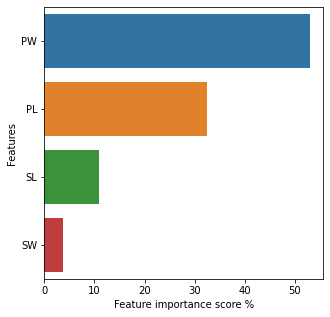

In [49]:
plt.figure(figsize=(5,5))
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.ylabel('Features')
plt.xlabel('Feature importance score %')
plt.show()

By analysing the plot of feature importance, it is clear that the feature 'PW' (Petal Width) is the most important feature 
on which the target variable depends

# Summary of the models created

We can conclude that :
    
 ** All the models are performing relatively well.
 
 ** Although, of these two models give the best result to predict the species since their acccuracy score and f1score are
    
    absolutely 1.They are:
        
        ## Decision Tree Model
        
        ## Linear SVM Model